# Setup and Requirements

1. Create an account on [Kaggle](https://www.kaggle.com/)
2. Go to [https://www.kaggle.com/settings](https://www.kaggle.com/settings)
3. Click on “Create New API Token” → this will download a file named `kaggle.json`
4. Save this file in the project's root directory or upload it to Colab when prompted
5. Run the following code lines

In [ ]:
from google.colab import files
files.upload()  #Select your kaggle.json file from your computer

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"santiagoboccardo","key":"43cf5f38cebe2ea2a1718e3b968c6815"}'}

In [ ]:
# Install the official Kaggle library
!pip install -q kaggle

# Create folder and move kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset from Kaggle
!kaggle datasets download -d jessemostipak/hotel-booking-demand

# Unzip
!unzip -o hotel-booking-demand.zip -d data

Dataset URL: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 663MB/s]
Archive:  hotel-booking-demand.zip
  inflating: data/hotel_bookings.csv  


# Importing Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the Dataset

In [ ]:
df = pd.read_csv("data/hotel_bookings.csv")

# Data Cleaning and Wrangling

In [ ]:
# Explore the first rows of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<font color="#00868B" size = "3"><b>Handling missing values</b></font>

In [ ]:
cols_with_nulls = df.columns[df.isnull().any()]
df[df.isnull().any(axis=1)][cols_with_nulls] # Shows columns containing missing values

,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN
2,0.0,GBR,NaN,NaN
3,0.0,GBR,304.0,NaN
4,0.0,GBR,240.0,NaN
...,...,...,...,...
119385,0.0,BEL,394.0,NaN
119386,0.0,FRA,9.0,NaN
119387,0.0,DEU,9.0,NaN
119388,0.0,GBR,89.0,NaN


The `children`, `country`, `agent`, and `company` columns often contain missing values. It is possible that some users did not include any children in their booking, which would explain the missing values in the `children` column.
The `country` column indicates the guest’s country of origin, so missing values should be handled carefully in further analysis. The `agent` and `company` columns represent the ID of the travel agency and the company that made the booking, respectively. Most likely, missing values in these columns indicate that the reservation was made directly by the customer.

Missing values in the `children` column will be replaced with 0 to maintain data consistency and avoid misinterpretation during aggregation.

In [ ]:
df["children"] = df["children"].fillna(0)

<font color="#00868B" size = "3"><b>Checking column names and data type </b></font>

In [ ]:
# Explore the names of the different columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

The column names appear to be properly labeled, and the dataset documentation provides clear descriptions for each. Therefore, the column names will be kept as they are.

In [ ]:
# Check data type for each column
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


The columns `arrival_date_year`, `arrival_date_month` and `arrival_date_day_of_month` should ideally be combined into a single column of `datetime` type. Additionally, the `reservation_status_date` column should be converted to `datetime`. Before performing these conversions, it is important to inspect the value formats in each column to ensure accuracy and prevent errors during transformation.

In [ ]:
df["arrival_date_year"].unique()

array([2015, 2016, 2017])

In [ ]:
df["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
df["arrival_date_day_of_month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
df["reservation_status_date"].unique()

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-15',
       '2015-07-16', '2015-05-29', '2015-05-19', '2015-06-19',
       '2015-05-23', '2015-05-18', '2015-07-09', '2015-06-02',
       '2015-07-13', '2015-07-04', '2015-06-29', '2015-06-16',
       '2015-06-18', '2015-06-12', '2015-06-09', '2015-05-26',
       '2015-07-11', '2015-07-12', '2015-07-17', '2015-04-15',
       '2015-05-13', '2015-07-10', '2015-05-20', '2015-05-12',
       '2015-07-14', '2015-06-17', '2015-05-01', '2015-03-30',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

In [ ]:
# Convert month name to month number
df["arrival_date_month"] = pd.to_datetime(df["arrival_date_month"], format="%B").dt.month

#Creating column 'arrival_date' including day, month and day of arrival
df["arrival_date"] = pd.to_datetime({
    "year": df["arrival_date_year"],
    "month": df["arrival_date_month"],
    "day": df["arrival_date_day_of_month"]
})

# Dropping the original separate columns
df.drop(["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"], axis=1, inplace=True)

In [ ]:
# Data type conversion for "reservation_status_date" column
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], format="%Y-%m-%d")

The data type of the `children` column (`float64`) is not appropriate, so we will convert it to `int64`. But first, we need to inspect the distribution of values in the `children` column to ensure that converting it to `int64` will not result in data loss or incorrect rounding:

In [ ]:
df["children"].value_counts()

,count
children,
0.0,110800
1.0,4861
2.0,3652
3.0,76
10.0,1


The `children` column is currently of type `float64`, but all non-null values are whole numbers. This suggests the column can be safely converted to `int64` without risk of rounding errors or data loss.

In [ ]:
df["children"] = df["children"].astype("int64")

Since the `object` data type is permissive, we will explore the data distribution in columns that have retained this type to ensure that the formatting is consistent and appropriate.

In [ ]:
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [ ]:
df["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df["distribution_channel"].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df["reserved_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [ ]:
df["assigned_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [ ]:
df["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
df["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
df["reservation_status"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In the `meal` column value names will be replaced as follow for more clarity:

*   `Undefined` and `'SC'` => `No meal`
*   `BB` => `Bed&Breakfast`
*   `HB` => `Half Board`
*   `FB` => `Full Board`

In [ ]:
df["meal"] = df["meal"].replace({"Undefined": "No meal", "SC": "No meal", "BB": "Bed&Breakfast", "HB": "Half Board", "FB": "Full Board"})

All the columns with `object` data type contain categorical values.Therefore, it is advisable to convert their data type from `object` to `category` to improve memory efficiency and provide clearer data semantics:

In [ ]:
cols_to_cat = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type',
               'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
for col in cols_to_cat:
    df[col] = df[col].astype('category')

<font color="#00868B" size = "3"><b>Identifying rows with erroneous data entry</b></font>

**Rows where the number of adults is zero:**

In [ ]:
df[df["adults"] == 0]

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
2224,Resort Hotel,0,1,41,0,3,0,0,0,No meal,...,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,2015-10-06
2409,Resort Hotel,0,0,42,0,0,0,0,0,No meal,...,NaN,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,2015-10-12
3181,Resort Hotel,0,36,47,1,2,0,0,0,No meal,...,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,2015-11-20
3684,Resort Hotel,0,165,53,1,4,0,0,0,No meal,...,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,2015-12-30
3708,Resort Hotel,0,165,53,2,4,0,0,0,No meal,...,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,2015-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,30,1,3,0,2,0,Bed&Breakfast,...,9.0,NaN,0,Transient,98.85,0,1,Check-Out,2017-07-31,2017-07-27
117274,City Hotel,0,276,31,2,1,0,2,0,Bed&Breakfast,...,9.0,NaN,0,Transient,93.64,0,2,Check-Out,2017-08-02,2017-07-30
117303,City Hotel,0,291,30,2,2,0,2,0,Bed&Breakfast,...,9.0,NaN,0,Transient,98.85,0,1,Check-Out,2017-08-02,2017-07-29
117453,City Hotel,0,159,31,1,3,0,2,0,No meal,...,9.0,NaN,0,Transient,121.88,0,1,Check-Out,2017-08-04,2017-07-31


These rows likely represent erroneous data entries and will be removed from the dataset:

In [ ]:
df = df[df["adults"] != 0]

**Rows where the total number of guests is zero:**

In [ ]:
df[df['adults'] + df['children'] + df['babies'] == 0]

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date


Also these rows likely represent erroneous data entries and will be removed from the dataset:

In [ ]:
df = df[df['adults'] + df['children'] + df['babies'] > 0].copy()

**Rows where the total number of nights is zero:**

In [ ]:
df[df['stays_in_weekend_nights'] + df['stays_in_week_nights'] == 0]

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0,0,Bed&Breakfast,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0,0,Bed&Breakfast,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
167,Resort Hotel,0,111,28,0,0,2,0,0,Bed&Breakfast,...,240.0,NaN,0,Transient,0.0,0,2,Check-Out,2015-07-06,2015-07-06
168,Resort Hotel,0,0,28,0,0,1,0,0,Bed&Breakfast,...,250.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-06,2015-07-06
196,Resort Hotel,0,8,28,0,0,2,0,0,Bed&Breakfast,...,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-07,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,27,0,0,1,0,0,No meal,...,14.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,2017-07-06
117701,City Hotel,0,0,32,0,0,2,0,0,Bed&Breakfast,...,262.0,NaN,0,Transient,0.0,0,0,Check-Out,2017-08-08,2017-08-08
118029,City Hotel,0,0,33,0,0,2,0,0,Bed&Breakfast,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2017-08-14,2017-08-14
118631,City Hotel,0,78,34,0,0,1,0,0,Bed&Breakfast,...,98.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,2017-08-23


As we do have arrival date but we do not have departure date, we cannot calculate values for stayed nights, so rows with total nights equal to zero will be eliminated:

In [ ]:
df = df[df['stays_in_weekend_nights'] + df['stays_in_week_nights'] > 0].copy()

<font color="#00868B" size = "3"><b>Handling duplicates</b></font>

In [ ]:
# Examining duplicated rows
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
5,Resort Hotel,0,14,27,0,2,2,0,0,Bed&Breakfast,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
22,Resort Hotel,0,72,27,2,4,2,0,0,Bed&Breakfast,...,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07,2015-07-01
43,Resort Hotel,0,70,27,2,3,2,0,0,Half Board,...,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07,2015-07-02
138,Resort Hotel,1,5,28,1,0,2,0,0,Bed&Breakfast,...,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01,2015-07-05
200,Resort Hotel,0,0,28,0,1,1,0,0,Bed&Breakfast,...,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,35,0,3,2,0,0,Bed&Breakfast,...,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03,2017-08-31
119352,City Hotel,0,63,35,0,3,3,0,0,Bed&Breakfast,...,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,2017-08-31
119353,City Hotel,0,63,35,0,3,3,0,0,Bed&Breakfast,...,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,2017-08-31
119354,City Hotel,0,63,35,0,3,3,0,0,Bed&Breakfast,...,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,2017-08-31


Although it's theoretically possible for two guests to make identical bookings, the presence of thousands of exact duplicate rows strongly suggests data redundancy rather than genuine repeated events. Therefore, removing duplicate records is a justified step in the data cleaning process.

In [ ]:
# Eliminating duplicated rows

df = df.drop_duplicates()

<font color="#00868B" size = "3"><b>Resetting the index</b></font>

After removing duplicate rows, the index is reset to maintain a clean and continuous index sequence.

In [ ]:
df.reset_index(drop=True, inplace=True)

# Exploratory Data Analysis

Although extensive visualization in Colab is not necessary given that the final analysis will be carried out in Power BI, a few key plots can still provide valuable insights to guide decisions regarding filters, segmentations, and key metrics to highlight in the dashboard.

<font color="#00868B" size = "3"><b>Summary statistics of numerical columns</b></font>

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date
count,86420.000000,86420.000000,86420.000000,86420.000000,86420.000000,86420.000000,86420.000000,86420.000000,86420.000000,86420.000000,86420.000000,86420.000000,74479.000000,5168.000000,86420.000000,86420.000000,86420.000000,86420.000000,86420,86420
mean,0.276614,80.184517,26.822136,1.011514,2.641958,1.885270,0.134506,0.010854,0.036380,0.030618,0.184865,0.267924,94.156057,183.027864,0.752152,107.311334,0.084888,0.699364,2016-08-31 16:18:13.413561856,2016-09-15 15:04:47.433464576
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,2015-07-01 00:00:00
25%,0.000000,12.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.900000,0.000000,0.000000,2016-03-18 00:00:00,2016-04-02 00:00:00
50%,0.000000,50.000000,27.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,99.000000,0.000000,0.000000,2016-09-08 00:00:00,2016-09-20 00:00:00
75%,1.000000,125.000000,37.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.750000,0.000000,1.000000,2017-03-06 00:00:00,2017-04-02 00:00:00
max,1.000000,709.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,2017-08-31 00:00:00
std,0.447327,86.022815,13.649204,1.027827,2.036356,0.615805,0.447223,0.113833,0.187236,0.370972,1.739323,0.709598,113.200779,130.656989,10.042052,54.387797,0.282551,0.832312,NaN,NaN


The `agent` and `company` columns have lower counts compared to the rest, which is due to the presence of NaN values as described before. Some columns contain binary values, while others span a wider range of integer values. In the case of those with a wider range, some appear to show high variability in their values. To better understand how the data is distributed in each column, different types of plots will be generated.


<font color="#00868B" size = "3"><b>Visualizing data from numerical columns</b></font>

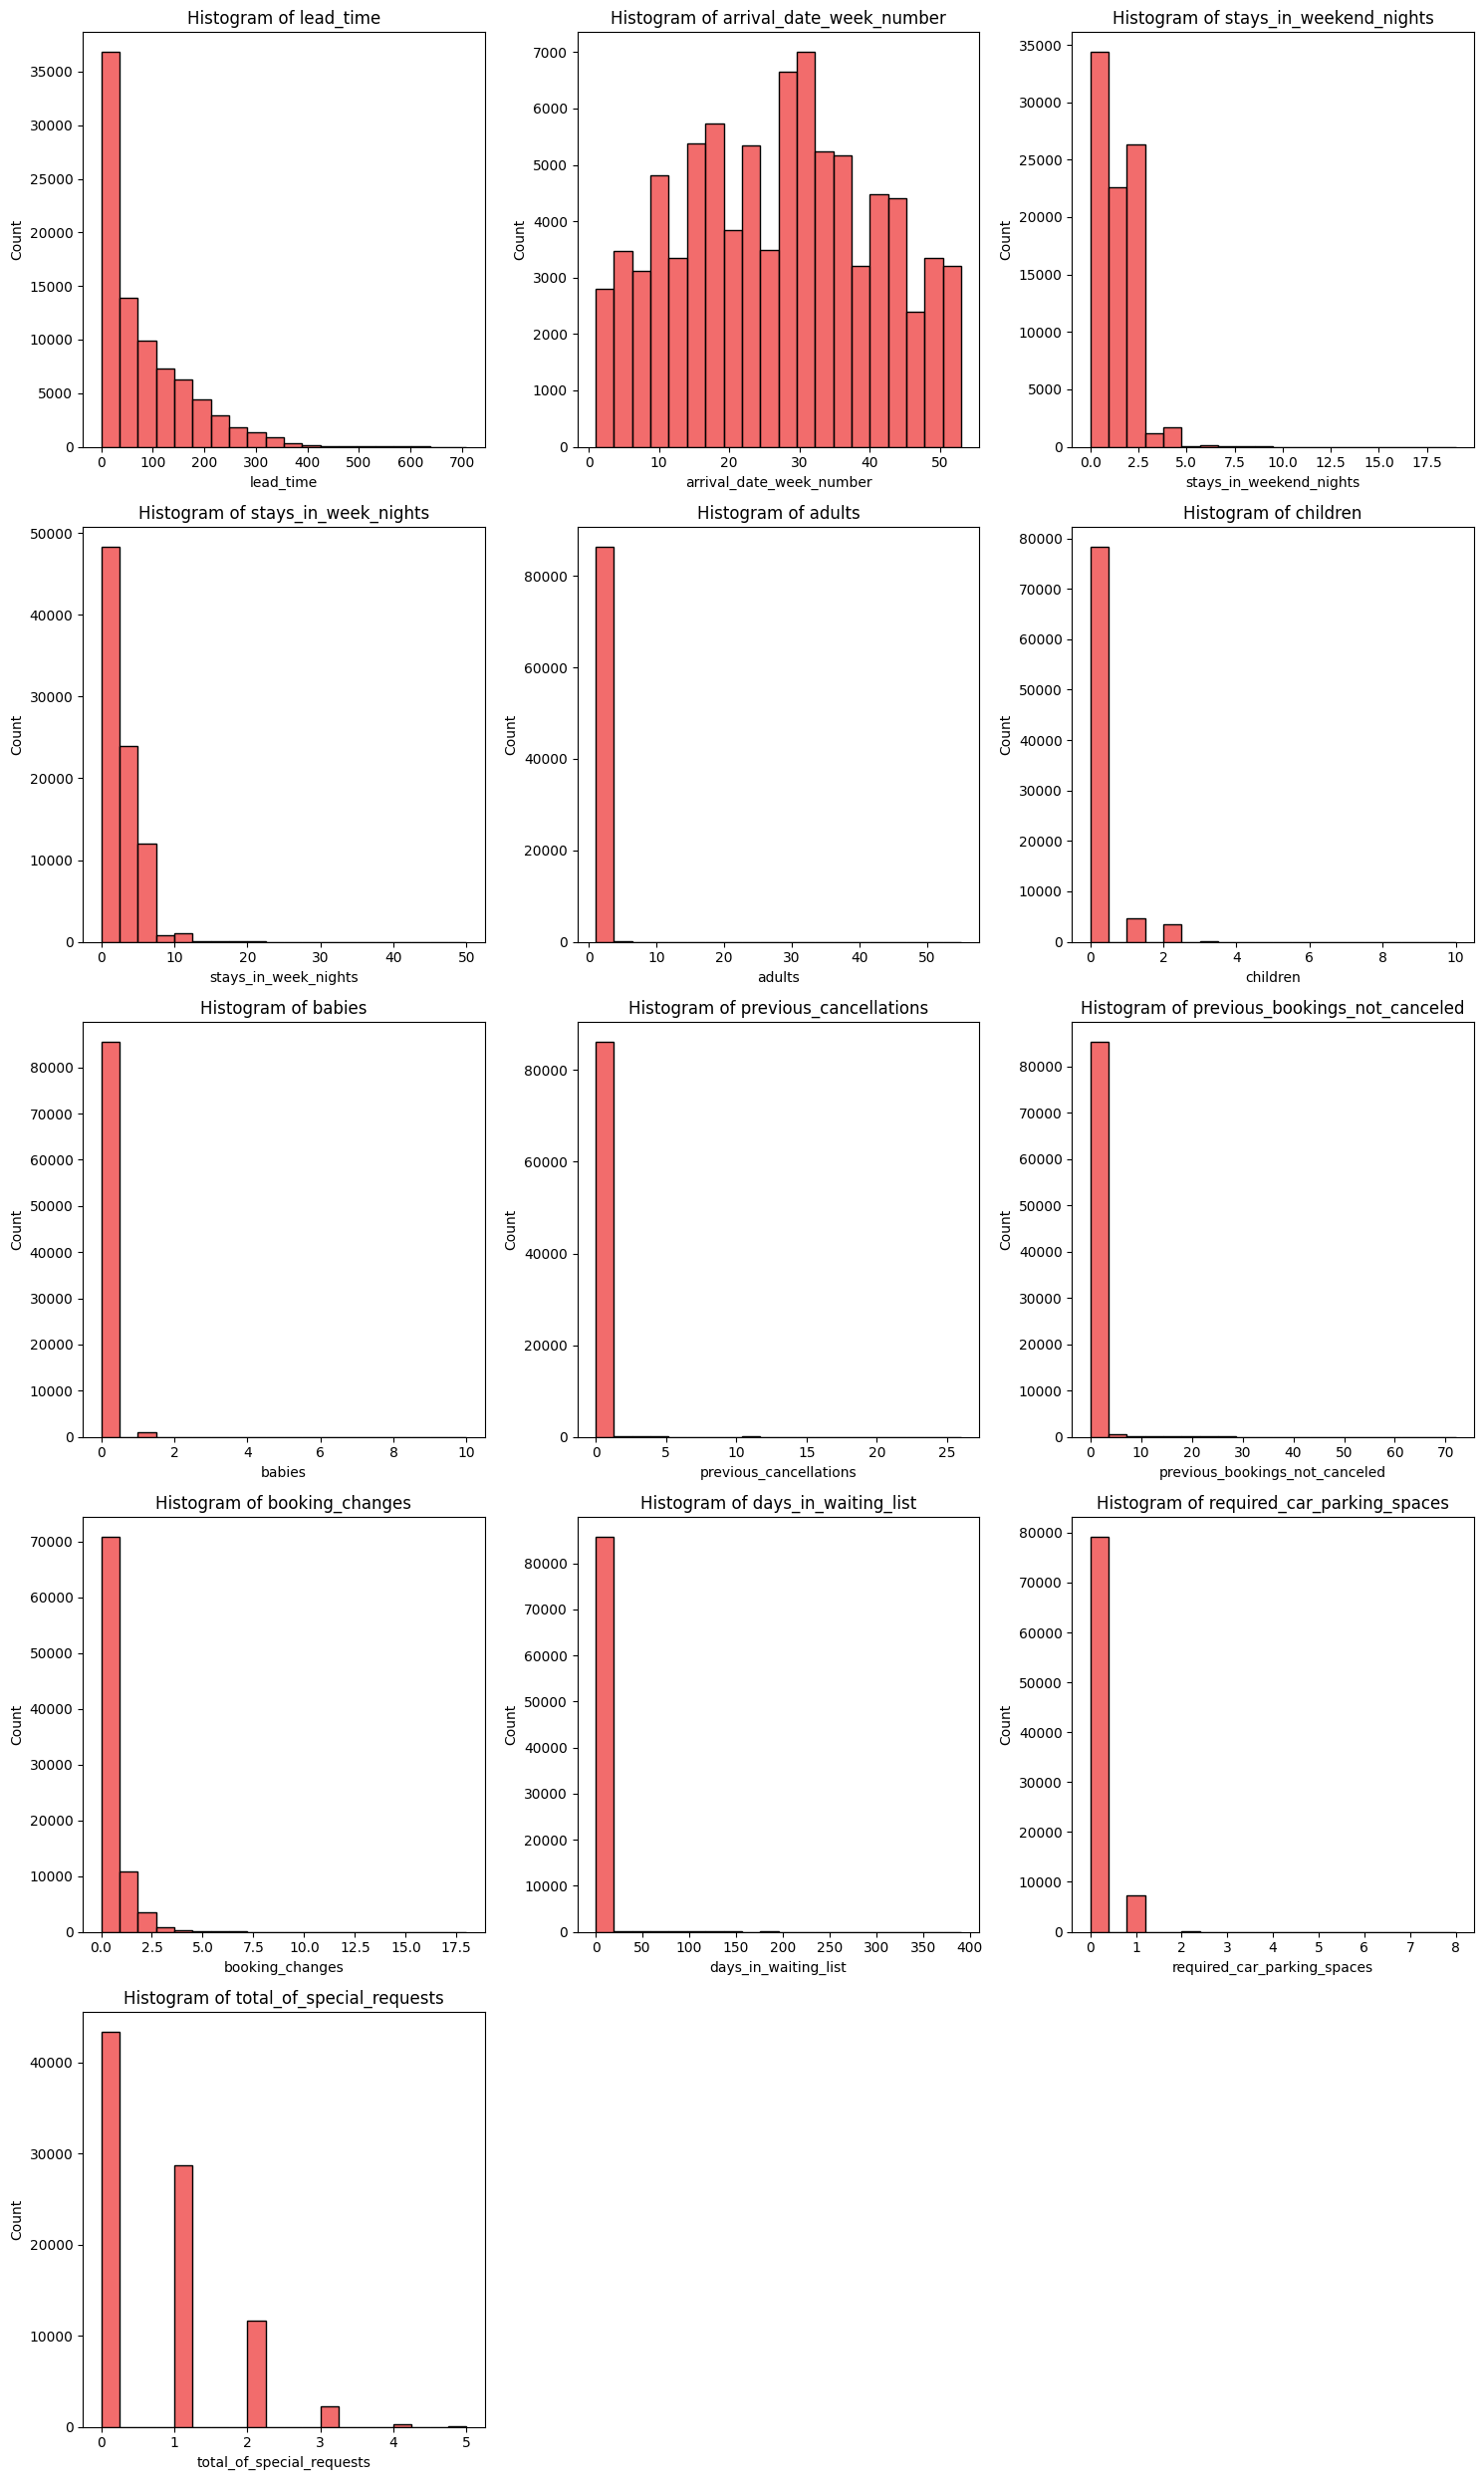

In [ ]:
# Select only columns with integer type (non-binary)
int_cols = ["lead_time", "arrival_date_week_number", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children",
            "babies", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list",
            "required_car_parking_spaces", "total_of_special_requests"]

# Number of selected columns
n_cols = len(int_cols)

# Define layout: max 3 plots per row
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot histogram for each selected column
for i, col in enumerate(int_cols):
    sns.histplot(df[col], ax=axes[i], color="#EE3B3B", bins=20)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Histogram of {col}")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The histograms for most integer features show no remarkable distributional anomalies. However, variables such as `days_in_waiting_list` and `booking_changes` exhibit a small number of records with notably high values compared to the majority, indicating possible outliers or exceptional cases. These long tails could be related to operational delays in booking confirmations or customers modifying their reservations multiple times. To further investigate these observations, boxplots will be used to visually identify and analyze potential outliers in those columns.

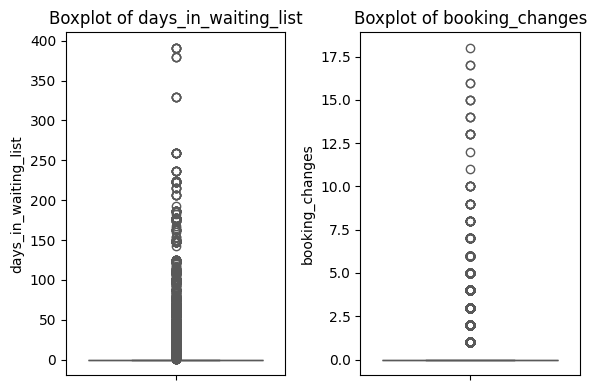

In [ ]:
# Columns to analyze for outliers
cols_to_check = ["days_in_waiting_list", "booking_changes"]

n_cols = len(cols_to_check)
fig, axes = plt.subplots(1, n_cols, figsize=(6, 4))

if n_cols == 1:
    axes = [axes]

for ax, col in zip(axes, cols_to_check):
    sns.boxplot(y=df[col], ax=ax, color="#EE3B3B")
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

`Days_in_waiting_list` and `booking_changes` clearly show extreme outliers, with values much higher than most observations, confirming the previous observation.

<font color="#00868B" size = "3"><b>Visualizing data from categorical columns</b></font>

To better understand the composition of key categorical features, bar plots were generated for a selected subset. This helps identify unbalanced distributions that may influence the analysis or dashboard design.

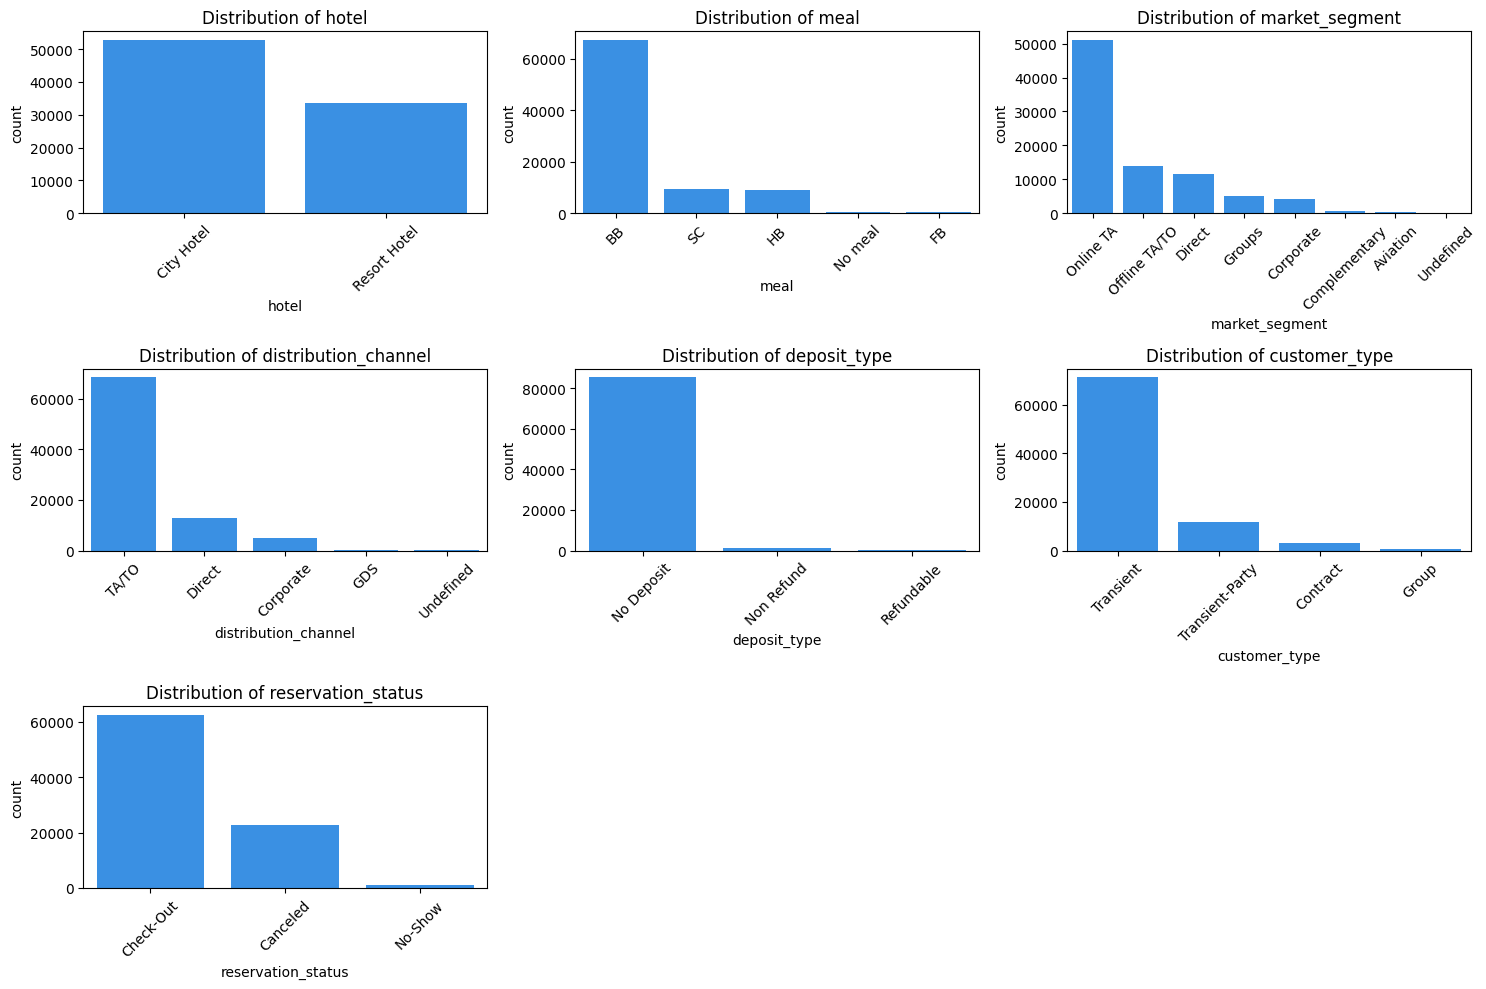

In [ ]:
# Categorical columns with relatively few distinct values (suitable for bar plots)
categorical_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                    'deposit_type', 'customer_type', 'reservation_status']

# Define subplot grid dimensions
n_cols = 3  # number of columns in the subplot grid
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # calculate required rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # flatten axes array for easy iteration

# Plot each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], color="#1E90FF",
                  order=df[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<font color="Red" size = "5"><b>Hacer coclusion de barras</b></font>

<font color="#00868B" size = "3"><b>Visualizing Temporal Trends in Arrival Data</b></font>

To identify seasonal patterns in booking activity, the number of arrivals was aggregated by month using the unified `arrival_date` column. A line plot was used to visualize trends over time, allowing for easy detection of peaks and troughs throughout the dataset.


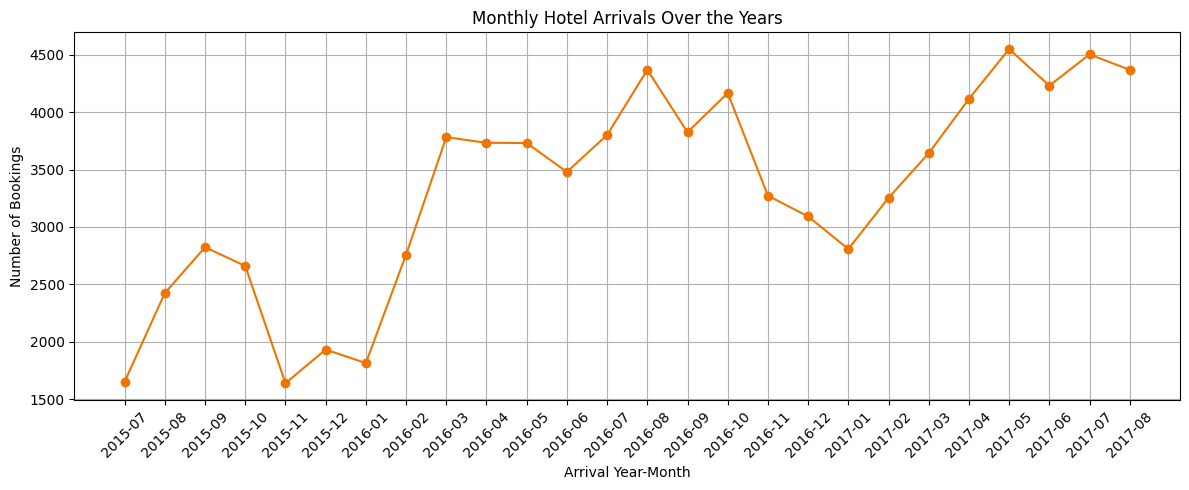

In [ ]:
# Convert arrival_date to monthly periods (e.g., 2016-07)
df['arrival_month-year'] = df['arrival_date'].dt.to_period('M')

# Count number of arrivals per month and sort chronologically
monthly_counts = df['arrival_month-year'].value_counts().sort_index()

# Plot the monthly trend as a line plot
plt.figure(figsize=(12, 5))
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, color='#EE7600', marker='o')

# Customize chart
plt.title("Monthly Hotel Arrivals Over the Years")
plt.ylabel("Number of Bookings")
plt.xlabel("Arrival Year-Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

An increase in bookings can be observed between July and October, recurring each year and becoming more pronounced over time. Conversely, the lowest number of bookings consistently occurs between November and January.

# Feature Engineering

After completing the data cleaning and general exploratory analysis, new columns will be generated by transforming existing data from the cleaned version of the dataset.

<font color="#00868B" size = "3"><b>Families related features</b></font>

In this section, we generate features that may help us identify family-oriented bookings.

In [ ]:
# Total number of guests (adults + children + babies)
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Total number of children (children + babies)
df['total_children'] = df['children'] + df['babies']

In [ ]:
df["adults"].value_counts()

,count
adults,
2,64108
1,16317
3,5919
4,60
26,5
5,2
27,2
20,2
40,1


In [ ]:
df['total_guests'].value_counts()

,count
total_guests,
2,56499
1,15884
3,10029
4,3856
5,135
26,5
12,2
27,2
10,2


In [ ]:
df["total_children"].value_counts()

,count
total_children,
0,77574
1,5249
2,3498
3,96
10,2
9,1


The majority of bookings involve 1 to 5 guests and include no more than 3 children in total.

<font color="#00868B" size = "3"><b>Stay duration related features</b></font>

Here, we create variables related to the length of stay to explore behavioral patterns in short vs long bookings.

In [ ]:
# Total number of nights (weekdays + weekends)
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [ ]:
# Categorize stays based on total number of nights
df['stay_length_category'] = pd.cut(df['total_nights'],
                                    bins=[0, 2, 7, 30, float('inf')],
                                    labels=['Short', 'Medium', 'Long', 'Very Long'])

The `stay_length_category` column classifies each booking according to the total number of nights. The categories are defined as follows:

**-Short:** 1 to 2 nights

**-Medium:** 3 to 7 nights

**-Long:** 8 to 30 nights

**-Very Long:** more than 30 night

<font color="#00868B" size = "3"><b>Booking Lead Time Categories</b></font>

In [ ]:
df['lead_time_category'] = pd.cut(df['lead_time'],
                                  bins=[-1, 30, 90, 180, df['lead_time'].max()],
                                  labels=['<1 month', '1–3 months', '3–6 months', '6+ months'])

The `lead_time_category` column groups bookings based on the number of days between the reservation date and the arrival date (lead time). This categorization allows us to analyze customer booking behavior according to how far in advance they plan their stays. The categories are:

**< 1 month:** bookings made less than 30 days in advance

**1–3 months:** bookings made between 30 and 90 days in advance

**3–6 months:** bookings made between 91 and 180 days in advance

**6+ months:** bookings made more than 180 days in advance

# Insights and Conclusions

During this analysis, missing data and duplicated rows were detected and addressed to ensure data quality.
A preliminary review revealed a clear seasonal pattern, with bookings peaking between July and October and increasing in volume each year.
Finally, newly engineered features—such as total guests, family size, and stay length categories—were created to enable better segmentation and deeper insights into booking behaviors.
These findings provide a solid foundation for further exploration and dashboard development in Power BI.



# Exporting Cleaned Data

In [ ]:
# Export the cleaned and feature-engineered DataFrame to a CSV file
df.to_csv("Cleaned_hotel_bookings.csv", index=False)

This file can now be downloaded and used for further analysis and dashboard creation in Power BI or other tools.